# 02 K-Means

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
data = iris.data

### Implementation of kmeans() function

In [3]:
def kmeans(data, ncluster=3):
    '''
    Takes a dataset as input and clusters it with k-means using
    Euclidean distance. 
    
    Creates array "data_points", where the first n columns
    store the columns of the input dataset and the last
    column stores the current cluster k. Each iteration, k
    gets updated to the cluster with the closest centroid.
    
    Centoids are stored in a seperate array "centroids" and
    updated after each iteration.
    
    Returns final version of "data_points" first and of "centroids"
    second.
    '''

    # Initialize K values

    # generate ncluster random numbers from the data index
    k_random_index = np.random.randint(len(data), size=(1, ncluster))
    k_random_index[0]

    # slice data with k_random_index to get centroids
    centroids = data[k_random_index, :][0].copy() # [0] removes unnecessary [] from indexing
    
    # Prepare Data Structure
    
    # genrate array of random intgegers which represent k which has one column more than data
    data_points = np.random.randint(0,ncluster, size=(data.shape[0], data.shape[1]+1))
    data_points = data_points.astype('float64')
    # Add data to the first columns of the array, column -1 always represents k
    data_points[:, :-1] = data
    
    # create array for distances
    distances = np.zeros((data_points.shape[0], centroids.shape[0]))

    convergence=False
    counter = 0
    
    # Loops until k values are converged
    while convergence == False: # **we are allowed to use this loop**
        counter += 1 
    
        # store initial k values to check for convergence
        initial_k_values = data_points[:,-1].copy()
        
        # compute distance and assign new k to each data point

        # compute eucledean distance in a vectorized way
        # **It's fine to use this loop but would be better to avoid it (broadcast)**
        for k in range(0, len(centroids)):
            distances[:,k] = np.linalg.norm(data_points[:,:-1] - centroids[k], axis=1)
    
        # can be directly used to assign new k
        # (argmin(acis=1)) returns column number with smallest distance and column numbers represent k
        data_points[:,-1] = np.argmin(distances, axis=1)
            
        # check for convergence (converged if k-column did not change anymore)
        updated_k_values = data_points[:,-1].copy()
        if np.array_equal(initial_k_values, updated_k_values):
            convergence = True
            # print('Convergence after {} steps'.format(counter))
        
        # compute new centroids:
        for k in range(0, len(centroids)): #** we are allowed to use this loop** 
            # returns indexes of respective columns
            index = np.where(data_points[:,-1]==k)
            # slice data for each k
            subset = data_points[[index],:][0][0].copy() # [0][0] removes [[]] from indexing
            # compute mean of each column of sliced data

            if len(subset) > 1: # no need to compute mean when only one point
                new_centroid = subset.mean(axis=0) # [0][0] removes [[]] from indexing
                # assign computed mean as new centroid (without last column which stores k value)
                centroids[k] = new_centroid[:-1].copy()
            else:
                pass
    
    return data_points, centroids

In [14]:
# showcase: apply k-means clustering on data including all variables
data = iris.data
km = kmeans(data[:25], ncluster=3)
print('data_points:')
print('')
print(km[0])
print('')
print('centroids:')
print('')
print(km[1])

data_points:

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 2. ]
 [4.7 3.2 1.3 0.2 2. ]
 [4.6 3.1 1.5 0.2 2. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 2. ]
 [5.  3.4 1.5 0.2 2. ]
 [4.4 2.9 1.4 0.2 2. ]
 [4.9 3.1 1.5 0.1 2. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 2. ]
 [4.8 3.  1.4 0.1 2. ]
 [4.3 3.  1.1 0.1 2. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 1. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 2. ]]

centroids:

[[5.33076923 3.73076923 1.5        0.30769231]
 [4.6        3.6        1.         0.2       ]
 [4.70909091 3.17272727 1.45454545 0.18181818]]


### Test the kmeans() function on iris

In [15]:
iris = datasets.load_iris()
data = iris.data
sepal_length_and_sepal_width = data[:,:2]

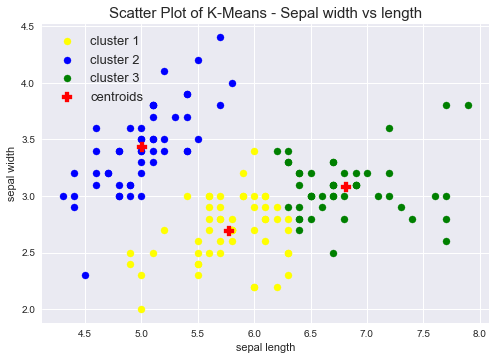

In [16]:
# Use kmeans function
km = kmeans(sepal_length_and_sepal_width, ncluster=3)

x_axis_label = 'sepal length'
y_axis_label = 'sepal width'

data_points = km[0] # first output
centroids = km[1] # second output
plt.style.use('seaborn')
plt.figure()

colors = ['yellow', 'blue', 'green']
for k in range(0, len(centroids)):
    # returns indexes of respective columns
    index = np.where(data_points[:,-1]==k)
    subset = data_points[[index],:]
    subset = subset[0][0][:,:-1]
    
    plt.scatter(subset[:,0], subset[:,1], s = 50, c = colors[k], 
                label = 'cluster '+str(k+1))

x = centroids[:,0]
y = centroids[:,1]
plt.scatter(x,y, color='red',s = 100, marker='P', label='centroids')

plt.title('Scatter Plot of K-Means - Sepal width vs length', fontsize=15)
plt.legend(fontsize=13)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()

In [17]:
iris = datasets.load_iris()
data = iris.data
sepal_length_and_petal_width = data[:,[0,-1]]

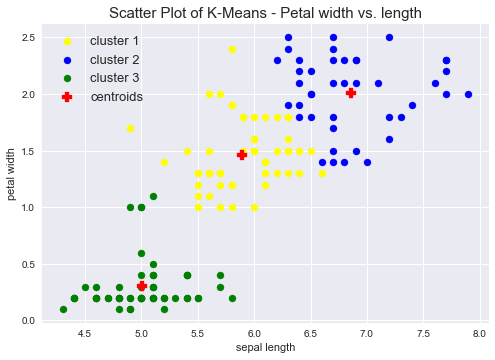

In [18]:
# Execute kmeans Function
km = kmeans(sepal_length_and_petal_width, ncluster=3)

x_axis_label = 'sepal length'
y_axis_label = 'petal width'

# Create Plot
data_points = km[0] # first output
centroids = km[1] # second output
plt.style.use('seaborn')
plt.figure()

colors = ['yellow', 'blue', 'green']
for k in range(0, len(centroids)):
    # returns indexes of respective columns
    index = np.where(data_points[:,-1]==k)
    subset = data_points[[index],:]
    subset = subset[0][0][:,:-1]
    
    plt.scatter(subset[:,0], subset[:,1], s = 50, c = colors[k], 
                label = 'cluster '+str(k+1))

x = centroids[:,0]
y = centroids[:,1]
plt.scatter(x,y, color='red',s = 100, marker='P', label='centroids')


plt.title('Scatter Plot of K-Means - Petal width vs. length', fontsize=15)
plt.legend(fontsize=13)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()

### Find Optimal Number of Clusters

In [12]:
#Computes Mean Cluster Distance for ncluster = [1 : 10]

# load data
data = iris.data
# list to store mean cluster distances
mean_cluster_distance = []

# iterate over ncluster
for n in range(1,11):
    
    # apply kmeans() with respective ncluster
    km = kmeans(data=data, ncluster=n)
    
    data_points = km[0]
    centroids = km[1]
    
    # list to store ssd for each cluster
    ssd_list = []
    ncluster = n

    for k in range(0, ncluster):

        # get index of dataset whith respective k
        idx = np.where(data_points[:,-1]==k)
        # slice data with respective k
        subset = data_points[[idx],:-1][0][0]
        # get respective centroid
        centroid = centroids[k]
        # compute SSD between subset and centroid
        ssd = np.sum(np.square(np.diff(subset - centroid, axis=1)))
        # append to list
        ssd_list.append(ssd)

    # compute mean of ssd list
    ssd_mean = np.mean(ssd_list)
    # add mean to 
    mean_cluster_distance.append(ssd_mean)

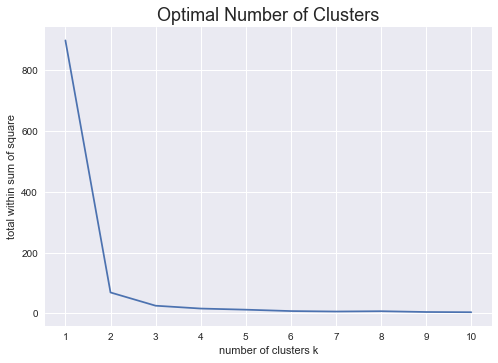

In [13]:
# Plot
x = np.arange(1, len(mean_cluster_distance)+1)
y = mean_cluster_distance
plt.plot(x,y)
plt.xlabel('number of clusters k')
plt.ylabel('total within sum of square')
plt.title('Optimal Number of Clusters', fontsize=18)
plt.xticks(x)
plt.show()